# Quickstart Tutorial Refresher
https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader # Wraps iterable around Dataset
from torchvision import datasets # Dataset stores samples and labels
from torchvision.transforms import ToTensor

In [2]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor())

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor())

In [3]:
batch_size = 64

# Wrap DataLoader iterable around training and test set:
train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
    print(f'Shape of X [N, C, H, W]: {X.shape}')
    print(f'Shape of y: {y.shape} {y.dtype}')
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu' )
print(device)

cpu


In [5]:
print(torch.version.cuda)

None


In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() # Put model in training mode
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        preds = model(X)
        loss = loss_fn(preds,y)
        
        # Back prop
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # Prevent gradient accumulation.
        
        if (batch % 100 == 0):
            loss, current = loss.item(), (batch+1)*len(X)
            print(f'loss: {loss} [{current}/{size}]')

In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {correct}, Avg Loss: {test_loss}')

In [11]:
epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}:')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1:
loss: 2.3097951412200928 [64/60000]
loss: 2.2971668243408203 [6464/60000]
loss: 2.2807164192199707 [12864/60000]
loss: 2.2672369480133057 [19264/60000]
loss: 2.2729685306549072 [25664/60000]
loss: 2.235024929046631 [32064/60000]
loss: 2.232646942138672 [38464/60000]
loss: 2.2042691707611084 [44864/60000]
loss: 2.1992714405059814 [51264/60000]
loss: 2.169276475906372 [57664/60000]
Test Error: 
 Accuracy: 0.475, Avg Loss: 2.1675296983901102
Epoch 2:
loss: 2.179441452026367 [64/60000]
loss: 2.1660566329956055 [6464/60000]
loss: 2.118237018585205 [12864/60000]
loss: 2.1260557174682617 [19264/60000]
loss: 2.091697931289673 [25664/60000]
loss: 2.0246806144714355 [32064/60000]
loss: 2.038767099380493 [38464/60000]
loss: 1.9678031206130981 [44864/60000]
loss: 1.9742379188537598 [51264/60000]
loss: 1.8971574306488037 [57664/60000]
Test Error: 
 Accuracy: 0.5833, Avg Loss: 1.9071385723770045
Epoch 3:
loss: 1.9391239881515503 [64/60000]
loss: 1.9082529544830322 [6464/60000]
loss: 1.80451

In [12]:
torch.save(model.state_dict(), 'model.pth')

In [13]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [14]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [15]:
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [16]:
x, y = test_data[0][0], test_data[0][1]

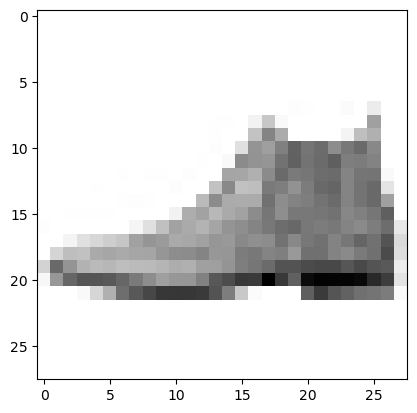

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x[0,:,:], cmap = 'Greys')

In [20]:
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: {predicted}, Actual: {actual}')

Predicted: Ankle boot, Actual: Ankle boot
